In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# open stock_descriptions.csv
stock_descriptions = pd.read_csv('Data/stock_descriptions.csv')
# open all_commodities.csv
all_commodities = pd.read_csv('Data/all_commodities.csv')
# open all_stock_and_etfs.csv
all_stock_and_etfs = pd.read_csv('Data/all_stock_and_etfs.csv')

In [59]:
stock_descriptions.info()
all_stock_and_etfs.info()
all_commodities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Symbol       31 non-null     object
 1   AssetType    31 non-null     object
 2   Name         31 non-null     object
 3   Description  31 non-null     object
 4   Sector       31 non-null     object
 5   Industry     31 non-null     object
dtypes: object(6)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163557 entries, 0 to 163556
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date-Time      163557 non-null  object 
 1   Open           163557 non-null  float64
 2   High           163557 non-null  float64
 3   Low            163557 non-null  float64
 4   Close          163557 non-null  float64
 5   Volume         163557 non-null  int64  
 6   Ticker_Symbol  163557 non-null  object 
dtypes: float64

In [60]:
# Fill the missing values/ null values in all_commodities with the value of its previous row
all_commodities.fillna(method='ffill', inplace=True)

In [61]:
# Set the Date-Time column to datetime format
all_commodities['Date-Time'] = pd.to_datetime(all_commodities['Date-Time'])
all_stock_and_etfs['Date-Time'] = pd.to_datetime(all_stock_and_etfs['Date-Time'])

In [62]:
# The Ticker_Symbol in all_stock_and_etfs corresponds to the Symbol in stock_descriptions
# Merge the two dataframes such that the Ticker_Symbol in all_stock_and_etfs corresponds to the Symbol in stock_descriptions
all_stock_and_etfs = pd.merge(all_stock_and_etfs, stock_descriptions, left_on='Ticker_Symbol', right_on='Symbol')
# Drop the Symbol column
all_stock_and_etfs.drop('Symbol', axis=1, inplace=True)
# Drop the Description column
all_stock_and_etfs.drop('Description', axis=1, inplace=True)


In [63]:
all_stock_and_etfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163557 entries, 0 to 163556
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date-Time      163557 non-null  datetime64[ns]
 1   Open           163557 non-null  float64       
 2   High           163557 non-null  float64       
 3   Low            163557 non-null  float64       
 4   Close          163557 non-null  float64       
 5   Volume         163557 non-null  int64         
 6   Ticker_Symbol  163557 non-null  object        
 7   AssetType      163557 non-null  object        
 8   Name           163557 non-null  object        
 9   Sector         163557 non-null  object        
 10  Industry       163557 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 13.7+ MB


In [64]:
# How many unique Ticker Symbols, AssetTypes, Sectors, and Industries are there in all_stock_and_etfs?
print(all_stock_and_etfs['Ticker_Symbol'].nunique())
print(all_stock_and_etfs['AssetType'].nunique())
print(all_stock_and_etfs['Sector'].nunique())
print(all_stock_and_etfs['Industry'].nunique())

# What are the unique AssetTypes, Sectors, and Industries in all_stock_and_etfs?
print(all_stock_and_etfs['AssetType'].unique())
print(all_stock_and_etfs['Sector'].unique())
print(all_stock_and_etfs['Industry'].unique())



29
2
4
17
['Common Stock' 'ETF']
['MANUFACTURING' 'MULTIPLE' 'TECHNOLOGY' 'TRADE & SERVICES']
['MEAT PACKING PLANTS' 'MULTIPLE' 'FATS & OILS'
 'FARM MACHINERY & EQUIPMENT' 'BEVERAGES' 'RETAIL-EATING PLACES'
 'RETAIL-BUILDING MATERIALS, HARDWARE, GARDEN SUPPLY'
 'POULTRY SLAUGHTERING AND PROCESSING' 'FOOD AND KINDRED PRODUCTS'
 'SUGAR & CONFECTIONERY PRODUCTS' 'CONSTRUCTION MACHINERY & EQUIP'
 'RETAIL-EATING & DRINKING PLACES'
 'BOTTLED & CANNED SOFT DRINKS & CARBONATED WATERS' 'GRAIN MILL PRODUCTS'
 'FABRICATED STRUCTURAL METAL PRODUCTS' 'SERVICES-PREPACKAGED SOFTWARE'
 'WHOLESALE-GROCERIES & RELATED PRODUCTS']


In [65]:
# Create a dataframe for each ETF, not each stock
DIA_df = all_stock_and_etfs[all_stock_and_etfs['Ticker_Symbol'] == 'DIA']
SPY_df = all_stock_and_etfs[all_stock_and_etfs['Ticker_Symbol'] == 'SPY']
ONEQ_df = all_stock_and_etfs[all_stock_and_etfs['Ticker_Symbol'] == 'ONEQ']
VOO_df = all_stock_and_etfs[all_stock_and_etfs['Ticker_Symbol'] == 'VOO']

# Get info for each ETF
print(DIA_df.info())
print(SPY_df.info())
print(ONEQ_df.info())
print(VOO_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6117 entries, 21729 to 27845
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date-Time      6117 non-null   datetime64[ns]
 1   Open           6117 non-null   float64       
 2   High           6117 non-null   float64       
 3   Low            6117 non-null   float64       
 4   Close          6117 non-null   float64       
 5   Volume         6117 non-null   int64         
 6   Ticker_Symbol  6117 non-null   object        
 7   AssetType      6117 non-null   object        
 8   Name           6117 non-null   object        
 9   Sector         6117 non-null   object        
 10  Industry       6117 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 573.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 6117 entries, 97478 to 103594
Data columns (total 11 columns):
 #   Column         Non-Null Count

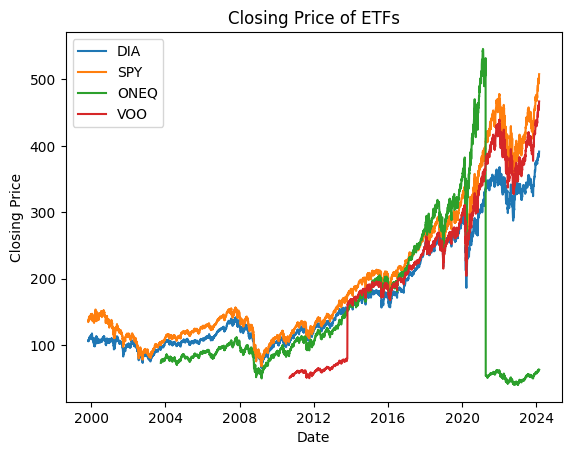

In [66]:
# Graph the closing price of each ETF on the same graph
plt.plot(DIA_df['Date-Time'], DIA_df['Close'], label='DIA')
plt.plot(SPY_df['Date-Time'], SPY_df['Close'], label='SPY')
plt.plot(ONEQ_df['Date-Time'], ONEQ_df['Close'], label='ONEQ')
plt.plot(VOO_df['Date-Time'], VOO_df['Close'], label='VOO')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price of ETFs')
plt.legend()
plt.show()


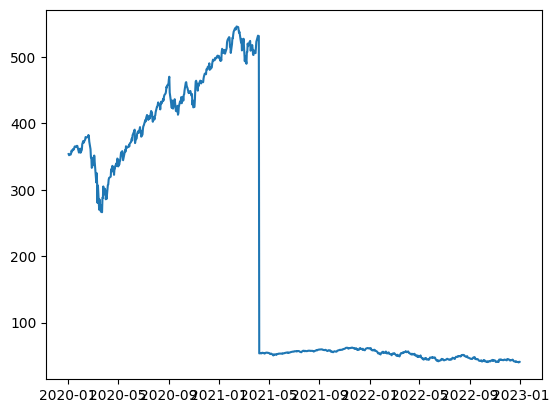

In [67]:
ONEQ_df_2020_2022 = ONEQ_df[(ONEQ_df['Date-Time'] >= '2020-01-01') & (ONEQ_df['Date-Time'] <= '2023-01-01')]
plt.plot(ONEQ_df_2020_2022['Date-Time'], ONEQ_df_2020_2022['Close'], label='ONEQ')

In [68]:
# convert this into csv
ONEQ_df_2020_2022.to_csv('Data/ONEQ_df_2020_2022.csv', index=False)

In [72]:
# Get ONEQ daily data from yahoo finance
import yfinance as yf
ONEQ = yf.Ticker('ONEQ')
ONEQ_df_yf = ONEQ.history(start='2004-01-01')
ONEQ_df_yf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5089 entries, 2004-01-02 00:00:00-05:00 to 2024-03-21 00:00:00-04:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           5089 non-null   float64
 1   High           5089 non-null   float64
 2   Low            5089 non-null   float64
 3   Close          5089 non-null   float64
 4   Volume         5089 non-null   int64  
 5   Dividends      5089 non-null   float64
 6   Stock Splits   5089 non-null   float64
 7   Capital Gains  5089 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 357.8 KB


In [73]:
display(ONEQ_df_yf)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2004-01-02 00:00:00-05:00,6.691248,6.710341,6.633134,6.646417,728000,0.000,0.0,0.0
2004-01-05 00:00:00-05:00,6.693739,6.790871,6.693739,6.786720,1005000,0.000,0.0,0.0
2004-01-06 00:00:00-05:00,6.800832,6.844831,6.761813,6.829888,755000,0.000,0.0,0.0
2004-01-07 00:00:00-05:00,6.828226,6.886339,6.787547,6.884678,1113000,0.000,0.0,0.0
2004-01-08 00:00:00-05:00,6.932002,6.960228,6.892984,6.949436,1855000,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-03-15 00:00:00-04:00,63.189999,63.189999,62.680000,62.830002,215900,0.112,0.0,0.0
2024-03-18 00:00:00-04:00,63.509998,63.959999,63.310001,63.330002,236200,0.000,0.0,0.0
2024-03-19 00:00:00-04:00,63.080002,63.750000,62.820000,63.650002,233200,0.000,0.0,0.0


In [ ]:
# Display the data for when 

In [74]:
display(ONEQ_df)

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol,AssetType,Name,Sector,Industry
42384,2024-02-23,63.44,63.60,62.8412,63.090,273699,ONEQ,ETF,Fidelity Nasdaq Composite Index ETF,MULTIPLE,MULTIPLE
42385,2024-02-22,62.63,63.30,62.5200,63.150,416835,ONEQ,ETF,Fidelity Nasdaq Composite Index ETF,MULTIPLE,MULTIPLE
42386,2024-02-21,61.25,61.47,60.9000,61.420,266787,ONEQ,ETF,Fidelity Nasdaq Composite Index ETF,MULTIPLE,MULTIPLE
42387,2024-02-20,61.94,61.99,61.0800,61.690,220588,ONEQ,ETF,Fidelity Nasdaq Composite Index ETF,MULTIPLE,MULTIPLE
42388,2024-02-16,62.74,62.83,62.1000,62.250,138333,ONEQ,ETF,Fidelity Nasdaq Composite Index ETF,MULTIPLE,MULTIPLE
...,...,...,...,...,...,...,...,...,...,...,...
47513,2003-10-07,75.42,76.37,75.1500,76.369,1065300,ONEQ,ETF,Fidelity Nasdaq Composite Index ETF,MULTIPLE,MULTIPLE
47514,2003-10-06,75.20,75.87,75.0400,75.781,904700,ONEQ,ETF,Fidelity Nasdaq Composite Index ETF,MULTIPLE,MULTIPLE
47515,2003-10-03,74.75,75.75,74.6500,75.190,1500900,ONEQ,ETF,Fidelity Nasdaq Composite Index ETF,MULTIPLE,MULTIPLE
47516,2003-10-02,73.19,73.70,72.8400,73.499,2448200,ONEQ,ETF,Fidelity Nasdaq Composite Index ETF,MULTIPLE,MULTIPLE
